<a href="https://colab.research.google.com/github/akashsingh11596/Information-Theory/blob/main/ENCODING_AND_DECODING_OF_MESSAGE_TRANSMITTED_OVER_SINUSOIDAL_WAVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENCODING AND DECODING OF MESSAGE TRANSMITTED OVER SINUSOIDAL WAVE**

**NAME - AKASH SINGH**

**UNIVERSITY OF REGINA**



**PART 1: PROBLEM DEFINITION**

In this python notebook, we will encode a message over a carrier wave which, is a sinusoidal wave. This message once encoded will be transmitted and later, will be decoded in another function. We have to make two function named encode() and decode(). Within these functions the message and the signal will be passed as a parameter respectively.

In [ ]:
import numpy as np
import math
import struct
from scipy import signal as sg
import matplotlib
import matplotlib.pyplot as plt
import binascii

**PART 2: GENERATION OF A CARRIER SIGNAL**

First, we will generate a carrier wave. After generation, we will encode a message over it.
To generate a carrier wave, we will first calculate the total number of points needed for mapping of a wave.

To calculate the points required for mapping, we first have to decide the number of samples. These samples will be used to represent a bit. We will also calculate the time. This time represents the period of a wave. The information is further transformed into Binary from ASCII. A variable message stores the binary value that we get from the conversion.
The sample per bit will then be  multiplied by the length of the message to give us the final sample needed for wave mapping  on graph.

The spaces in the message entered by us will also be converted in binary form and then later on decode in the code.

On plotting this carrier signal, we will get a sinusoidal wave.


**PART 3: GENERATING AND ENCODING OF MESSAGE SIGNAL**

Now we will generate and decode the message signal. The variable "message" stores a list of 0 and 1. These numbers are the list of amplitudes. For encoding variable "message", we have used a scheme where we are replacing zero with one and one with two.
On plotting this message signal, we will get a square wave. We get a square wave because we only have two values, in the message which are zero and one.  

The new numbers that the scheme generates are appending in list variable messageList.
Now we will generate the final signal. The signal generation will be done by multiplying the message signal by the carrier signal. This value of the signal is shown in the graph by using 'matplotlib'.

We have mapped the final signal in the notebook to represent how the signal will look when transmitted.



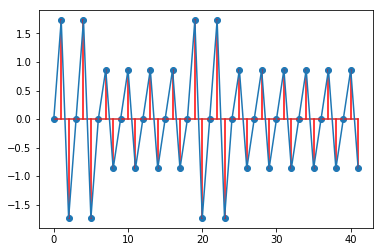

In [ ]:
def encode(asciiMessage):
  asciiMessage = asciiMessage
  global length
  global spb
  global signalLength
  spb = 6
  cpb = 2
  T = spb/cpb
  
  binMessage =bin(int.from_bytes(asciiMessage.encode(), 'big'))
  binMessage = binMessage.replace("b","")
  message = []
  for bit in binMessage:
    message.append(int(bit))
  
  message.pop(0)    
  samples = spb*len(message)
  x = np.arange(samples)
  carrier = np.sin(2*np.pi*(1/T)*(x))
  x_list = x.tolist()
  
  messageList = []
  for bit in message:
    if bit is 0:
      for i in range(0,spb):
        messageList.append(1)
    else:
      for i in range(0,spb):
        messageList.append(2)
  message = messageList
  length = len(message)
  signal = carrier * message
  signalLength = len(signal)
  % matplotlib inline
  plt.stem(x,signal, 'r')
  plt.plot(x,signal)
  
  message1 = message
  message1.extend(x_list)
  
  return signal

asciiMessage = 'H'
signal = encode(asciiMessage)


Above is the final wave obtained by combining the carrier signal and the message signal.

**PART 4: DECODING OF THE WAVE**

Next step which comes after encoding of message is decoding. 

For decoding, we are using a loop and if statement. This loop will run through all the elements of the signal list and then compare them with the set value. If the value of the element in the list is greater than the set value then, the appending value in the list will be 1 otherwise 0 will be appended.

In [ ]:
print(signalLength)
print(signal)  
final_list = []
def decode(signal):
  global a
  a = 0
  for i in range(0,signalLength):
    a = a+1
    if (a == spb):
      if signal[i] > 1.5 or signal[i]< -1.5:
        final_list.append(1)
        a=0
      else:
        final_list.append(0)
        a=0
  return final_list
    
    
decoded_signal = decode(signal)
print(decoded_signal)
print(len(decoded_signal))

42
[ 0.00000000e+00  1.73205081e+00 -1.73205081e+00 -4.89858720e-16
  1.73205081e+00 -1.73205081e+00 -4.89858720e-16  8.66025404e-01
 -8.66025404e-01 -7.34788079e-16  8.66025404e-01 -8.66025404e-01
 -9.79717439e-16  8.66025404e-01 -8.66025404e-01 -4.77736048e-15
  8.66025404e-01 -8.66025404e-01 -2.93915232e-15  1.73205081e+00
 -1.73205081e+00 -3.42901104e-15  1.73205081e+00 -1.73205081e+00
 -1.95943488e-15  8.66025404e-01 -8.66025404e-01 -9.30979160e-15
  8.66025404e-01 -8.66025404e-01 -9.55472096e-15  8.66025404e-01
 -8.66025404e-01 -9.79965032e-15  8.66025404e-01 -8.66025404e-01
 -2.93915232e-15  8.66025404e-01 -8.66025404e-01 -1.02895090e-14
  8.66025404e-01 -8.66025404e-01]
[1, 0, 0, 1, 0, 0, 0]
7


**PART 5: CONVERSION FROM BINARY TO ASCII**

The last thing we will do is the conversion of the data which we have received after decoding the signal. This is done so that we can understand what the decrypted text in the binary form means. 

In [ ]:
str1 =''.join(str(e) for e in decoded_signal)
n = int(str1, 2)
n.to_bytes((n.bit_length() + 7) // 8, 'big').decode()

'H'

**REFERENCES**

Gist. (2019). generatingSignals.ipynb. [online] Available at: https://gist.github.com/trevortomesh/7df84a9e049ebeeed09f765ba22598f0 [Accessed 25 Jun. 2019].

versa, C., Tran, M. and Burns, K. (2019). Convert binary to ASCII and vice versa. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/7396849/convert-binary-to-ascii-and-vice-versa [Accessed 25 Jun. 2019].